# 6. Handling data

In the previous chapter, we used data that were generated by a function and batched together manually. We would however like to avoid rewriting similar code, e.g. for batching, for each new dataset. To avoid this we can used two very uesful tools of Pytorch called ```Dataset``` and ```DataLoader``` found in the ```from torch.utils.data``` module.

In [1]:
from torch.utils.data import Dataset, DataLoader

Just like for the Network with ```nn.Module``` both of these objects are used as basis on top of which to build and providing a series of very useful features.

In [2]:
# set path containing data folder or use default for Colab (/gdrive/My Drive)
local_folder = "../"
import urllib.request
urllib.request.urlretrieve('https://raw.githubusercontent.com/guiwitz/DLImaging/master/utils/check_colab.py', 'check_colab.py')
from check_colab import set_datapath
colab, datapath = set_datapath(local_folder)

## Dataset

Just like for the network with ```nn.Module``` we use here a base class ```Dataset``` that we extend for our own requirements. A ```Dataset``` simply provides samples as pairs of data and target. The only things we have to provide are 

1. a method returning the sample (```__getitem__```)
2. a method indicating the size of the dataset (```__len__```).

Using the image generating function of the last chapter, we have generated images of circles and triangles and saved them and their list of labels as ```npy``` files. 

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [4]:
images = np.load(datapath.joinpath('data/triangle_circle.npy'))
labels = np.load(datapath.joinpath('data/triangle_circle_label.npy'))

As before we use the ```Dataset``` as base and build on top of it. Here we can pass the data and labels when we construct and object. And then we can fill the ```__getitem__``` and ```__len__``` methods using classic Numpy functions. We also do some processingm, like normalizing between 0-1:

In [5]:
class Tricircle(Dataset):
    def __init__(self, data, labels, transform=None):
        super(Tricircle, self).__init__()
        self.data = data
        self.labels = labels

    def __getitem__(self, index):
        
        x = self.data[index]
        x = torch.tensor(x/255, dtype=torch.float32)
        y = torch.tensor(self.labels[index])
        
        return x, y

    def __len__(self):

        return len(labels)

Here we provide the actual data as inputs to the ```Dataset``` but the data are often imported from within that object. Then we simply use indexing to recover single images from the Numpy stack, normalize them and return them.

In [6]:
tridata = Tricircle(images, labels)

In [7]:
myimage, mylabel = tridata[10]

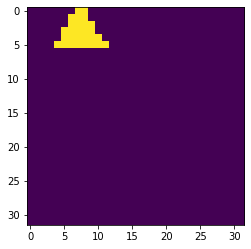

In [8]:
plt.imshow(myimage);

In [9]:
mylabel

tensor(0)

### Training and validation

Either we have prepared two datasets, one for training and one for validation, for example in two folders on disk, or we have one large dataset that we need to split. Here the ```random_split``` function comes in handy. We can for example directly apply it to our dataset object:

In [10]:
from torch.utils.data import random_split

In [11]:
test_size = int(0.8 * len(tridata))
valid_size = len(tridata)-test_size

In [12]:
train_data, valid_data = random_split(tridata, [test_size, valid_size])

In [13]:
len(train_data)

40000

In [14]:
len(valid_data)

10000

## DataLoader

We can then pass this dataset to another base object called a ```DataLoader```. This object will take care of many things for us, in particular batching so that we don't have to do it manually anymore. In the simplest case we only need a ```Dataset``` and a batch size as input:

In [15]:
dataloader = DataLoader(tridata, batch_size=10)

```dataloader``` is an iterable, and therefore we can access elements using:

In [16]:
im_batch, label_batch = next(iter(dataloader))

Let's see if the size of the returned elements in the expected one:

In [17]:
im_batch.size()

torch.Size([10, 32, 32])

In [18]:
label_batch.size()

torch.Size([10])

The ```DataLoader``` object has additional featues. For heavy import and pre-processing steps, we can e.g. load data in parallel with multiple workers. We can also create random batches to avoid over-fitting a model on specific batches etc.

## Exercise

In the folder data/drawings, you can find a series of .npy files containing images of little drawings. The names of the .npy files indicate what type of drawing the file contains. Try to create a dataset and dataloader for those files. It should return randomly images of 2-3 categories.